INF2178 Midterm Submission

Jupyter Notebook

Paul King, Zijian Zhang

Importing the dataset

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


In [ ]:
# Data cleaning
# Information about the dataset indicates that if a stripsearch but no booking is listed, that is an error
# If StripSearch = 1, then Booked should also = 1

df["Booked"] = np.where((df["StripSearch"] == 1) & (df["Booked"] == 0),1,df["Booked"])
df = df.replace(["Aged 65 years and older","Aged 17 years and younger"],["Aged 65 and older","Aged 17 years and under"])



In [ ]:
df.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.528265,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499204,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [ ]:
# Categorical variables: Perceived_Race, Sex, Youth_at_arrest__under_18_years,
#   ArrestLocDiv, Occurrence_Category, SearchReason_CauseInjury, SearchReason_AssistEscape, SearchReason_PossessWeapons,
#   SearchReason_PossessEvidence, ItemsFound
# Ordinal variables: Arrest_Month, Age_group__at_arrest_
# Binary variables: Arrest_Year (2020 or 2021), StripSearch, Booked, Actions_at_arrest___Concealed_i,
#   Actions_at_arrest___Combative__, Actions_at_arrest___Resisted__d, Actions_at_arrest___Mental_inst,
#   Actions_at_arrest___Assaulted_o, Actions_at_arrest___Cooperative
# Note: we can convert arrest year + arrest month to a single variable for time series


df.dtypes

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [ ]:
for variable in df.columns.values:
  print(variable, len(df[variable].unique()))

Arrest_Year 2
Arrest_Month 4
EventID 60003
ArrestID 64806
PersonID 37347
Perceived_Race 9
Sex 3
Age_group__at_arrest_ 8
Youth_at_arrest__under_18_years 3
ArrestLocDiv 18
StripSearch 2
Booked 2
Occurrence_Category 32
Actions_at_arrest___Concealed_i 2
Actions_at_arrest___Combative__ 2
Actions_at_arrest___Resisted__d 2
Actions_at_arrest___Mental_inst 2
Actions_at_arrest___Assaulted_o 2
Actions_at_arrest___Cooperative 2
SearchReason_CauseInjury 3
SearchReason_AssistEscape 3
SearchReason_PossessWeapons 3
SearchReason_PossessEvidence 3
ItemsFound 3
ObjectId 65276


Since there are multiple rows of arrests per person ID, we can calculate probabilities of stripsearching and booking and count the number of arrests.

Explanatory variables - Age / Sex / Perceived Race
Output variables - % probability of stripsearch/booking
stripsearch -> booking

Because Some person IDs have multiple age groups/race, we take the most frequent (mode) of data

In [ ]:
# Create list of lists which represent individuals with unique PersonIDs
# We convert this list into a new dataframe for analysis

import statistics
from statistics import mode # arresting officers may input race/age/sex differently, best to take mode

list_of_lists = []
for ID in df["PersonID"].unique():
  subdf = df[df["PersonID"] == ID].reset_index()
  Youth = False
  if mode(subdf["Youth_at_arrest__under_18_years"]) == "Youth (aged 17 years and under)":
    Youth = True
  person_list = [ID, mode(subdf["Perceived_Race"]),mode(subdf["Sex"]),
                 mode(subdf["Age_group__at_arrest_"]),
                 Youth,
                 subdf["StripSearch"].sum()/len(subdf), # Calculate probability of search
                 subdf["Booked"].sum()/len(subdf),len(subdf)] # Calculate probability of arrest
  list_of_lists.append(person_list)
df2 = pd.DataFrame(list_of_lists, 
                   columns = ["PersonID","Perceived_Race","Sex","Age_group","Youth","StripSearch","Booked","Arrests"])
df2=df2.set_index("PersonID")
df2

,Perceived_Race,Sex,Age_group,Youth,StripSearch,Booked,Arrests
PersonID,,,,,,,
326622,White,M,Aged 35 to 44 years,False,0.000000,1.000000,3
327535,South Asian,M,Aged 25 to 34 years,False,0.000000,0.666667,3
330778,Black,M,Aged 25 to 34 years,False,0.142857,0.571429,7
328630,Indigenous,M,Aged 45 to 54 years,False,0.000000,0.000000,1
312724,Unknown or Legacy,M,Aged 25 to 34 years,False,0.250000,0.625000,8
...,...,...,...,...,...,...,...
316123,Indigenous,F,Aged 25 to 34 years,False,0.000000,0.000000,1
307736,South Asian,M,Aged 35 to 44 years,False,0.000000,1.000000,1
324057,White,F,Aged 45 to 54 years,False,0.000000,0.000000,1


In [ ]:
# Remove rows with unknown/NAN data

df2 = df2.dropna(subset=["Perceived_Race","Age_group"])
df2 = df2.drop(df2[df2.Perceived_Race == 'Unknown or Legacy'].index)
df2 = df2.drop(df2[df2.Sex == 'U'].index)

In [ ]:
# Remove rows with arrests more than 3 standard deviations from mean
df2 = df2[df2["Arrests"] < 8]
len(df2)

33178

In [ ]:
df2.describe()

,StripSearch,Booked,Arrests
count,33178.000000,33178.000000,33178.000000
mean,0.081926,0.476358,1.537826
std,0.244000,0.464559,1.121342
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.500000,1.000000
75%,0.000000,1.000000,2.000000
max,1.000000,1.000000,7.000000


Exploratory Data Analysis

In [ ]:
px.histogram(df2["Arrests"], title = "Histogram of Arrests", x="Arrests")
# Our data is not normally distributed, which violates an assumption

In [ ]:
px.histogram(df2["StripSearch"], title = "Histogram of Stripsearch Probabilities", labels={'value':'Stripsearch %'})

In [ ]:
px.histogram(df2["Booked"], title = "Histogram of Booking Probabilities", labels={'value':'Booked %'}) # Not sure why labels are not showing up

T-tests

In [ ]:
# T-test function
from scipy import stats

def welchttest(column,cat1,cat2,outcome,print=False):
  a = df2[df2[column]==cat1]
  b = df2[df2[column]==cat2]
  t_stat, p_value = stats.ttest_ind(a[outcome], b[outcome], equal_var=False)
  significant = "Not statistically significant"
  if p_value < 0.05:
    significant = "Statistically significant"
  if print==True:
    print("Welch's T-Test: Comparing " + outcome + " outcomes depending on " + column)
    print(str(cat1) + " compared to " + str(cat2))
    print("T-statistic: " + str(t_stat))
    print("P-value: " + str(p_value) + ", " + significant)
  return cat1,cat2,t_stat,p_value

In [ ]:
ttestlist = [welchttest("Perceived_Race","White","South Asian","StripSearch"),
welchttest("Perceived_Race","White","Black","StripSearch"),
welchttest("Perceived_Race","White","Indigenous","StripSearch"),
welchttest("Perceived_Race","White","Latino","StripSearch"),
welchttest("Perceived_Race","White","Middle-Eastern","StripSearch"),
welchttest("Perceived_Race","White","East/Southeast Asian","StripSearch"),
welchttest("Perceived_Race","South Asian","Black","StripSearch"),
welchttest("Perceived_Race","South Asian","Indigenous","StripSearch"),
welchttest("Perceived_Race","South Asian","Latino","StripSearch"),
welchttest("Perceived_Race","South Asian","Middle-Eastern","StripSearch"),
welchttest("Perceived_Race","South Asian","East/Southeast Asian","StripSearch"),
welchttest("Perceived_Race","Black","Indigenous","StripSearch"),
welchttest("Perceived_Race","Black","Latino","StripSearch"),
welchttest("Perceived_Race","Black","Middle-Eastern","StripSearch"),
welchttest("Perceived_Race","Black","East/Southeast Asian","StripSearch"),
welchttest("Perceived_Race","Indigenous","Latino","StripSearch"),
welchttest("Perceived_Race","Indigenous","Middle-Eastern","StripSearch"),
welchttest("Perceived_Race","Indigenous","East/Southeast Asian","StripSearch"),
welchttest("Perceived_Race","Latino","Middle-Eastern","StripSearch"),
welchttest("Perceived_Race","Latino","East/Southeast Asian","StripSearch"),
welchttest("Perceived_Race","Middle-Eastern","East/Southeast Asian","StripSearch"),
welchttest("Sex","M","F","StripSearch"),
welchttest("Youth",True,False,"StripSearch")]
ttestdf = pd.DataFrame(ttestlist,columns=["Group 1","Group 2","T-stat","P-value"])
ttestdf

,Group 1,Group 2,T-stat,P-value
0,White,South Asian,7.727654,1.387389e-14
1,White,Black,-6.110532,1.012092e-09
2,White,Indigenous,-2.203086,2.793469e-02
3,White,Latino,6.258431,5.161265e-10
4,White,Middle-Eastern,7.673372,2.231767e-14
5,White,East/Southeast Asian,8.544994,1.652046e-17
6,South Asian,Black,-11.470274,4.320539e-30
7,South Asian,Indigenous,-5.160114,3.122395e-07
8,South Asian,Latino,0.505736,6.130927e-01
9,South Asian,Middle-Eastern,0.261951,7.933713e-01


In [ ]:
ttestlist = [welchttest("Perceived_Race","White","South Asian","Booked"),
welchttest("Perceived_Race","White","Black","Booked"),
welchttest("Perceived_Race","White","Indigenous","Booked"),
welchttest("Perceived_Race","White","Latino","Booked"),
welchttest("Perceived_Race","White","Middle-Eastern","Booked"),
welchttest("Perceived_Race","White","East/Southeast Asian","Booked"),
welchttest("Perceived_Race","South Asian","Black","Booked"),
welchttest("Perceived_Race","South Asian","Indigenous","Booked"),
welchttest("Perceived_Race","South Asian","Latino","Booked"),
welchttest("Perceived_Race","South Asian","Middle-Eastern","Booked"),
welchttest("Perceived_Race","South Asian","East/Southeast Asian","Booked"),
welchttest("Perceived_Race","Black","Indigenous","Booked"),
welchttest("Perceived_Race","Black","Latino","Booked"),
welchttest("Perceived_Race","Black","Middle-Eastern","Booked"),
welchttest("Perceived_Race","Black","East/Southeast Asian","Booked"),
welchttest("Perceived_Race","Indigenous","Latino","Booked"),
welchttest("Perceived_Race","Indigenous","Middle-Eastern","Booked"),
welchttest("Perceived_Race","Indigenous","East/Southeast Asian","Booked"),
welchttest("Perceived_Race","Latino","Middle-Eastern","Booked"),
welchttest("Perceived_Race","Latino","East/Southeast Asian","Booked"),
welchttest("Perceived_Race","Middle-Eastern","East/Southeast Asian","Booked"),
welchttest("Sex","M","F","Booked"),
welchttest("Youth",True,False,"Booked")]
ttestdf = pd.DataFrame(ttestlist,columns=["Group 1","Group 2","T-stat","P-value"])
ttestdf

,Group 1,Group 2,T-stat,P-value
0,White,South Asian,0.872575,3.829586e-01
1,White,Black,-8.825244,1.176096e-18
2,White,Indigenous,-2.172552,3.016325e-02
3,White,Latino,-3.246871,1.197285e-03
4,White,Middle-Eastern,1.175167,2.400341e-01
5,White,East/Southeast Asian,4.007577,6.234131e-05
6,South Asian,Black,-5.844779,5.515114e-09
7,South Asian,Indigenous,-2.402893,1.644595e-02
8,South Asian,Latino,-3.312181,9.410786e-04
9,South Asian,Middle-Eastern,0.281387,7.784269e-01


In [ ]:
ttestlist = [welchttest("Perceived_Race","White","South Asian","Arrests"),
welchttest("Perceived_Race","White","Black","Arrests"),
welchttest("Perceived_Race","White","Indigenous","Arrests"),
welchttest("Perceived_Race","White","Latino","Arrests"),
welchttest("Perceived_Race","White","Middle-Eastern","Arrests"),
welchttest("Perceived_Race","White","East/Southeast Asian","Arrests"),
welchttest("Perceived_Race","South Asian","Black","Arrests"),
welchttest("Perceived_Race","South Asian","Indigenous","Arrests"),
welchttest("Perceived_Race","South Asian","Latino","Arrests"),
welchttest("Perceived_Race","South Asian","Middle-Eastern","Arrests"),
welchttest("Perceived_Race","South Asian","East/Southeast Asian","Arrests"),
welchttest("Perceived_Race","Black","Indigenous","Arrests"),
welchttest("Perceived_Race","Black","Latino","Arrests"),
welchttest("Perceived_Race","Black","Middle-Eastern","Arrests"),
welchttest("Perceived_Race","Black","East/Southeast Asian","Arrests"),
welchttest("Perceived_Race","Indigenous","Latino","Arrests"),
welchttest("Perceived_Race","Indigenous","Middle-Eastern","Arrests"),
welchttest("Perceived_Race","Indigenous","East/Southeast Asian","Arrests"),
welchttest("Perceived_Race","Latino","Middle-Eastern","Arrests"),
welchttest("Perceived_Race","Latino","East/Southeast Asian","Arrests"),
welchttest("Perceived_Race","Middle-Eastern","East/Southeast Asian","Arrests"),
welchttest("Sex","M","F","Arrests"),
welchttest("Youth",True,False,"Arrests")]
ttestdf = pd.DataFrame(ttestlist,columns=["Group 1","Group 2","T-stat","P-value"])
ttestdf

,Group 1,Group 2,T-stat,P-value
0,White,South Asian,14.334801,1.327993e-45
1,White,Black,2.739393,6.160219e-03
2,White,Indigenous,-6.755233,3.199905e-11
3,White,Latino,6.289578,4.270308e-10
4,White,Middle-Eastern,8.558659,1.784198e-17
5,White,East/Southeast Asian,15.637849,4.162438e-54
6,South Asian,Black,-11.859983,5.208061e-32
7,South Asian,Indigenous,-10.845527,1.987220e-25
8,South Asian,Latino,-2.424673,1.541893e-02
9,South Asian,Middle-Eastern,-2.815076,4.900317e-03


In [ ]:
# arrests vs races
fig = px.box(df2, x="Perceived_Race", y="Arrests",title="Arrest Boxplots by Perceived Race")
fig.show()

In [ ]:
# arrests vs age
fig = px.box(df2, x="Age_group", y="Arrests",title="Arrest Boxplots by Age Group")
fig.show()

In [ ]:
# arrests vs age
fig = px.box(df2, x="Youth", y="Arrests",title="Arrest Boxplots by Youth Status")
fig.show()

In [ ]:
# arrests vs sex
fig = px.box(df2, x="Sex", y="Arrests",title="Arrest Boxplots by Sex")
fig.show()

ANOVA

In [ ]:
# RQ 1

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Arrests ~ C(Perceived_Race)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Perceived_Race),540.526545,6.0,72.57297,2.682945e-90
Residual,41176.501486,33171.0,NaN,NaN


In [ ]:
# RQ 2

model = ols('StripSearch ~ C(Age_group)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Age_group),9.226929,6.0,25.946673,5.782752e-31
Residual,1965.996816,33171.0,NaN,NaN


In [ ]:
# RQ 3

model = ols('Booked ~ C(Sex) + C(Perceived_Race) +C(Sex):C(Perceived_Race)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 7, but rank is 4

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 14, but rank is 10



,sum_sq,df,F,PR(>F)
C(Sex),119.042476,2.0,241.470471,3.287566e-105
C(Perceived_Race),14.740370,7.0,8.542843,6.899906e-07
C(Sex):C(Perceived_Race),21.870997,14.0,6.337714,8.372582e-10
Residual,16084.531301,65253.0,NaN,NaN


Interaction Plot

In [ ]:
df3 = df2
df3.reset_index(inplace = True)
df3

,PersonID,Perceived_Race,Sex,Age_group,Youth,StripSearch,Booked,Arrests
0,326622,White,M,Aged 35 to 44 years,False,0.000000,1.000000,3
1,327535,South Asian,M,Aged 25 to 34 years,False,0.000000,0.666667,3
2,330778,Black,M,Aged 25 to 34 years,False,0.142857,0.571429,7
3,328630,Indigenous,M,Aged 45 to 54 years,False,0.000000,0.000000,1
4,324224,Black,M,Aged 45 to 54 years,False,0.000000,1.000000,1
...,...,...,...,...,...,...,...,...
33173,311475,White,F,Aged 25 to 34 years,False,0.000000,0.000000,1
33174,316123,Indigenous,F,Aged 25 to 34 years,False,0.000000,0.000000,1
33175,307736,South Asian,M,Aged 35 to 44 years,False,0.000000,1.000000,1
33176,324057,White,F,Aged 45 to 54 years,False,0.000000,0.000000,1


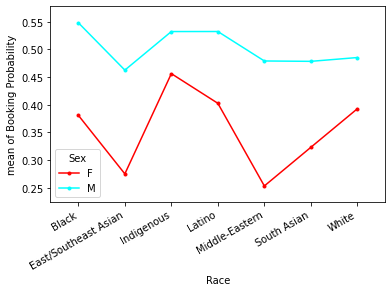

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
race = df3['Perceived_Race'].astype("category")
youth = df3['Youth'].astype("category")
sex = df3['Sex'].astype("category")
outcome = df3['Booked'].values
fig = interaction_plot(
    x=df3['Perceived_Race'],
    trace=sex,
    response=outcome,
    xlabel="Race",
    ylabel="Booking Probability"
)
fig.autofmt_xdate()


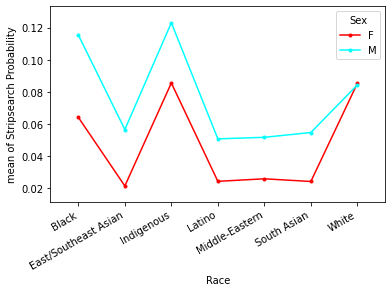

In [ ]:
race = df3['Perceived_Race'].astype("category")
youth = df3['Youth'].astype("category")
sex = df3['Sex'].astype("category")
outcome = df3['StripSearch'].values
fig = interaction_plot(
    x=df3['Perceived_Race'],
    trace=sex,
    response=outcome,
    xlabel="Race",
    ylabel="Stripsearch Probability"
)
fig.autofmt_xdate()


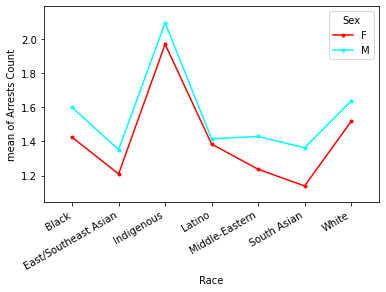

In [ ]:
race = df3['Perceived_Race'].astype("category")
youth = df3['Youth'].astype("category")
sex = df3['Sex'].astype("category")
outcome = df3['Arrests'].values
fig = interaction_plot(
    x=df3['Perceived_Race'],
    trace=sex,
    response=outcome,
    xlabel="Race",
    ylabel="Arrests Count"
)
fig.autofmt_xdate()


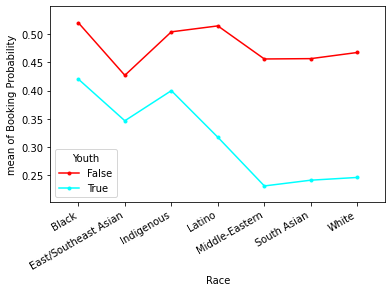

In [ ]:
race = df3['Perceived_Race'].astype("category")
youth = df3['Youth'].astype("category")
sex = df3['Sex'].astype("category")
outcome = df3['Booked'].values
fig = interaction_plot(
    x=df3['Perceived_Race'],
    trace=youth,
    response=outcome,
    xlabel="Race",
    ylabel="Booking Probability"
)
fig.autofmt_xdate()


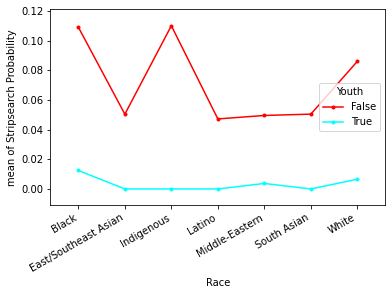

In [ ]:
race = df3['Perceived_Race'].astype("category")
youth = df3['Youth'].astype("category")
sex = df3['Sex'].astype("category")
outcome = df3['StripSearch'].values
fig = interaction_plot(
    x=df3['Perceived_Race'],
    trace=youth,
    response=outcome,
    xlabel="Race",
    ylabel="Stripsearch Probability"
)
fig.autofmt_xdate()


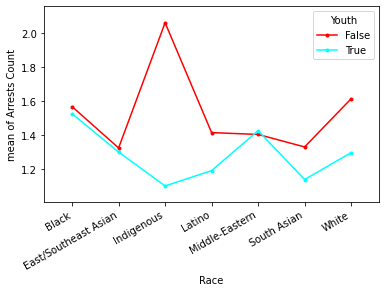

In [ ]:
race = df3['Perceived_Race'].astype("category")
youth = df3['Youth'].astype("category")
sex = df3['Sex'].astype("category")
outcome = df3['Arrests'].values
fig = interaction_plot(
    x=df3['Perceived_Race'],
    trace=youth,
    response=outcome,
    xlabel="Race",
    ylabel="Arrests Count"
)
fig.autofmt_xdate()


Tukey's HSD Test

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey1 = pairwise_tukeyhsd(df3['Arrests'],df3['Perceived_Race'])
print(tukey1)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.2429  0.001 -0.3106 -0.1751   True
               Black           Indigenous   0.4808  0.001  0.3439  0.6177   True
               Black               Latino  -0.1561  0.001 -0.2605 -0.0516   True
               Black       Middle-Eastern  -0.1621  0.001  -0.242 -0.0822   True
               Black          South Asian  -0.2387  0.001 -0.3131 -0.1644   True
               Black                White   0.0416 0.0687 -0.0016  0.0848  False
East/Southeast Asian           Indigenous   0.7236  0.001  0.5783   0.869   True
East/Southeast Asian               Latino   0.0868 0.2848 -0.0285  0.2021  False
East/Southeast Asian       Middle-Eastern   0.0808 0.1441 -0.0129  0.1744  False
East/Southeast Asian        

In [ ]:
tukey1df = pd.DataFrame(data=tukey1._results_table.data[1:], columns=tukey1._results_table.data[0])
tukey1df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Black,East/Southeast Asian,-0.2429,0.0010,-0.3106,-0.1751,True
1,Black,Indigenous,0.4808,0.0010,0.3439,0.6177,True
2,Black,Latino,-0.1561,0.0010,-0.2605,-0.0516,True
3,Black,Middle-Eastern,-0.1621,0.0010,-0.2420,-0.0822,True
4,Black,South Asian,-0.2387,0.0010,-0.3131,-0.1644,True
5,Black,White,0.0416,0.0687,-0.0016,0.0848,False
6,East/Southeast Asian,Indigenous,0.7236,0.0010,0.5783,0.8690,True
7,East/Southeast Asian,Latino,0.0868,0.2848,-0.0285,0.2021,False
8,East/Southeast Asian,Middle-Eastern,0.0808,0.1441,-0.0129,0.1744,False
9,East/Southeast Asian,South Asian,0.0041,0.9000,-0.0848,0.0931,False


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey2 = pairwise_tukeyhsd(df3['StripSearch'],df3['Age_group'])
print(tukey2)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
         group1                group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
Aged 17 years and under Aged 18 to 24 years   0.0428  0.001  0.0238  0.0619   True
Aged 17 years and under Aged 25 to 34 years   0.0263  0.001  0.0082  0.0443   True
Aged 17 years and under Aged 35 to 44 years   0.0208 0.0165  0.0022  0.0393   True
Aged 17 years and under Aged 45 to 54 years   0.0085  0.844 -0.0111  0.0281  False
Aged 17 years and under Aged 55 to 64 years  -0.0048    0.9 -0.0264  0.0168  False
Aged 17 years and under   Aged 65 and older  -0.0346 0.0063 -0.0632 -0.0061   True
    Aged 18 to 24 years Aged 25 to 34 years  -0.0165  0.001 -0.0284 -0.0046   True
    Aged 18 to 24 years Aged 35 to 44 years   -0.022  0.001 -0.0347 -0.0094   True
    Aged 18 to 24 years Aged 45 to 54 years  -0.0343  0.001 -0.0484 -0.0201   True
    

In [ ]:
tukey2df = pd.DataFrame(data=tukey2._results_table.data[1:], columns=tukey2._results_table.data[0])
tukey2df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Aged 17 years and under,Aged 18 to 24 years,0.0428,0.0010,0.0238,0.0619,True
1,Aged 17 years and under,Aged 25 to 34 years,0.0263,0.0010,0.0082,0.0443,True
2,Aged 17 years and under,Aged 35 to 44 years,0.0208,0.0165,0.0022,0.0393,True
3,Aged 17 years and under,Aged 45 to 54 years,0.0085,0.8440,-0.0111,0.0281,False
4,Aged 17 years and under,Aged 55 to 64 years,-0.0048,0.9000,-0.0264,0.0168,False
5,Aged 17 years and under,Aged 65 and older,-0.0346,0.0063,-0.0632,-0.0061,True
6,Aged 18 to 24 years,Aged 25 to 34 years,-0.0165,0.0010,-0.0284,-0.0046,True
7,Aged 18 to 24 years,Aged 35 to 44 years,-0.0220,0.0010,-0.0347,-0.0094,True
8,Aged 18 to 24 years,Aged 45 to 54 years,-0.0343,0.0010,-0.0484,-0.0201,True
9,Aged 18 to 24 years,Aged 55 to 64 years,-0.0476,0.0010,-0.0645,-0.0308,True
